<a href="https://colab.research.google.com/github/Vishnusoman1999/testgooglepai/blob/main/CNN_Sample__for_Number_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds

Citation
@article{lecun2010mnist,
  title={MNIST handwritten digit database},
  author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
  journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
  volume={2},
  year={2010}
}

In [3]:
ds, ds_info = tfds.load('mnist', shuffle_files=True, as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
test_ds, train_ds = ds["test"], ds["train"]

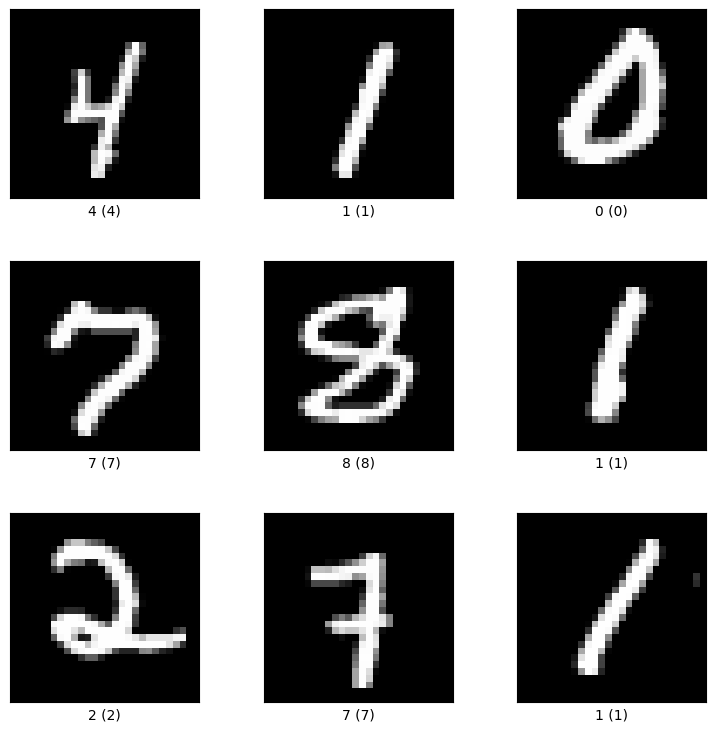

In [5]:
fig = tfds.show_examples(train_ds, ds_info)

In [11]:
MAX_SIDE_LEN = 128
NUM_Class = 9
train_ds = train_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIDE_LEN, MAX_SIDE_LEN]), dtype=tf.int32), tf.cast(label == NUM_Class, dtype=tf.int32))
)
test_ds = test_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIDE_LEN, MAX_SIDE_LEN]), dtype=tf.int32), tf.cast(label == NUM_Class, dtype=tf.int32))
)

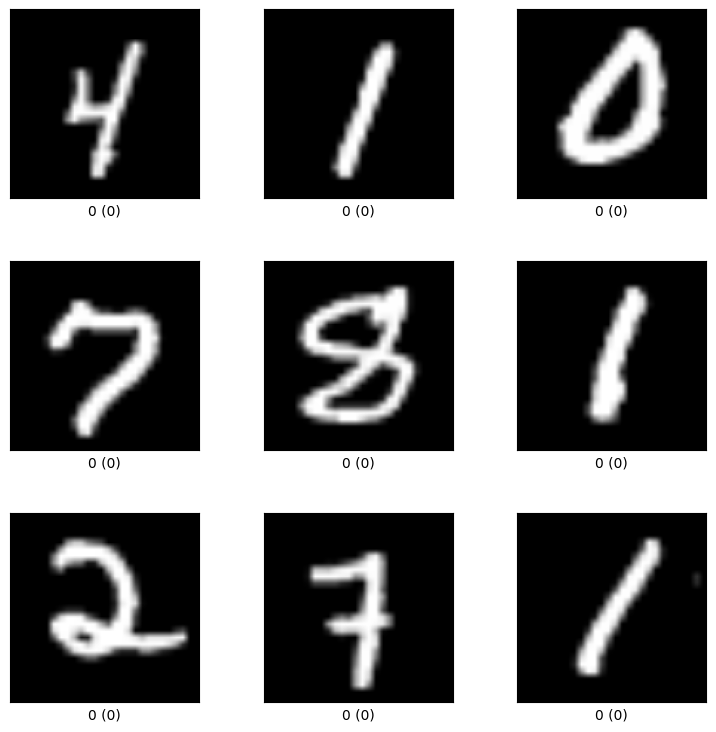

In [13]:
fig = tfds.show_examples(train_ds, ds_info)

In [14]:
train_hd_size, valid_hd_size = 750, 250
train_nine = train_ds.filter(lambda _, label: label == 1).repeat(3)
train_notnine = train_ds.filter(lambda _, label: label == 0)

In [16]:
test_nine = test_ds.filter(lambda _, label: label == 1).repeat(3)
test_notnine = test_ds.filter(lambda _, label: label == 0)

In [17]:
test_nine

<_RepeatDataset element_spec=(TensorSpec(shape=(128, 128, 1), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [18]:
batch_size = 16
train_ds = tf.data.Dataset.sample_from_datasets([train_nine, train_notnine], weights=[0.5, 0.5], stop_on_empty_dataset=True)
train_ds = train_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.sample_from_datasets([test_nine, test_notnine], weights=[0.5, 0.5], stop_on_empty_dataset=True)
test_ds = test_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [19]:
for image, label in train_ds.take(3):
  print(image[0][0][0])
  print(label)

tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0 0], shape=(2,), dtype=int32)


In [20]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [21]:
random.seed(0)
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(MAX_SIDE_LEN, MAX_SIDE_LEN, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))

In [22]:
lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
  verbose=1
)

Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 1.9981 - accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 185ms/step - loss: 1.9335 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 215ms/step - loss: 1.8568 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 192ms/step - loss: 1.8202 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 177ms/step - loss: 1.7443 - accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 179ms/step - loss: 1.6821 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 171ms/step - loss: 1.5919 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 190ms/step - loss: 1.5418 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 200ms/step - loss: 1.5080 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 186ms/step - loss: 1.4264 - accuracy: 1.0000
Epoch 11/50
1/1 [===

In [24]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in test_ds.take(1):
  images = image_batch
  labels = label_batch

<Figure size 1000x1000 with 0 Axes>

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(images[i])
  plt.axis("off")

In [ ]:
labels[:9]